# Human Detection using AlexNet

## Objective
This project aims to classify images for the presence of humans using AlexNet and integrate additional functionalities for object and pose detection. The project involves:

1. **Data Preprocessing**:
   - Loading, resizing, and normalizing images.
   - Splitting the dataset into training, validation, and test sets.

2. **Data Augmentation**:
   - Enhancing dataset diversity through transformations.

3. **AlexNet Implementation**:
   - Building and training the AlexNet model.
   - Evaluating the model's performance.

4. **Object Detection**:
   - Using pre-trained models like YOLO or SSD to localize and identify humans in images.
   - Visualizing detected humans with bounding boxes.

5. **Pose Detection**:
   - Identifying keypoints of the human body (e.g., joints) using models like MediaPipe Pose or OpenPose.
   - Estimating human poses and visualizing them on images or video feeds.

This comprehensive pipeline ensures accurate classification, detection, and pose estimation of humans in images, enhancing the project's utility and scope.


In [15]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Data Preprocessing

In [16]:
# Define functions for preprocessing
def load_and_preprocess_images(data_dir, target_size=(227, 227)):
    images = []
    labels = []
    classes = ['0', '1']  # 0: No humans, 1: With humans

    for label in classes:
        class_dir = os.path.join(data_dir, label)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                image = cv2.resize(image, target_size)
                images.append(image)
                labels.append(int(label))
    X = np.array(images, dtype='float32') / 255.0
    y = np.array(labels, dtype='int')
    return X, y

def split_dataset(X, y, test_size=0.2, val_size=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Preprocessing pipeline
DATA_DIR = "human_detection_dataset"
X, y = load_and_preprocess_images(DATA_DIR)
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Training set: (662, 227, 227, 3), Validation set: (74, 227, 227, 3), Test set: (185, 227, 227, 3)


### Data Augmentation

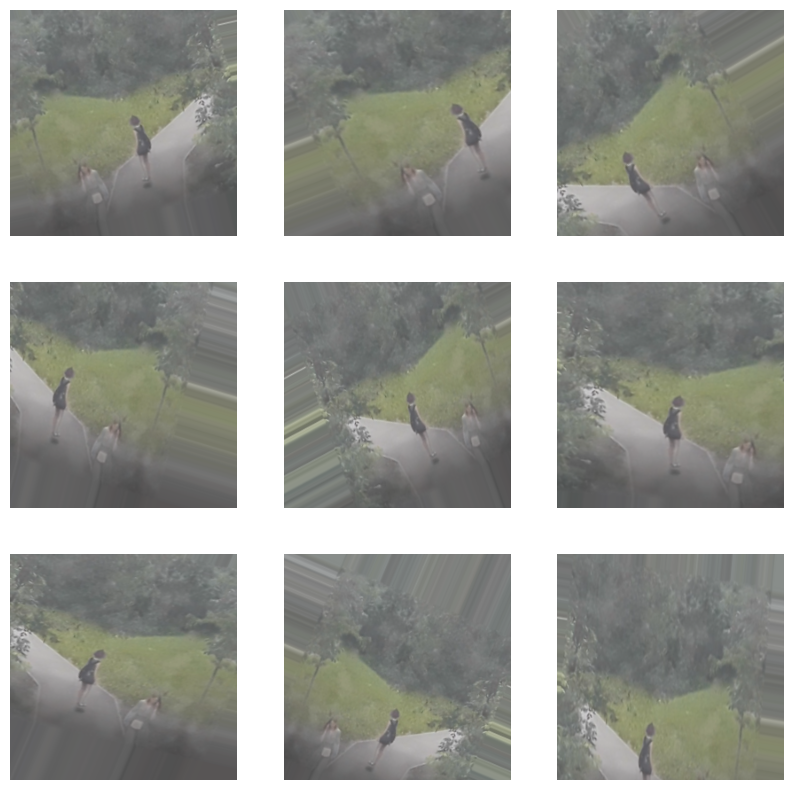

In [17]:
# Define and visualize augmentations
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def visualize_augmentations(image):
    # Normalize the image to [0, 1] range if it's in [0, 255]
    if image.max() > 1.0:
        image = image / 255.0
    
    # Add batch dimension
    image = image[np.newaxis, ...]
    aug_iter = datagen.flow(image)

    # Plot augmented images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        aug_image = next(aug_iter)[0]
        plt.imshow(aug_image)
        plt.axis('off')
    plt.show()

# Visualize augmented images
sample_image_path = os.path.join('human_detection_dataset', '1', os.listdir('human_detection_dataset/1')[0])
sample_image = plt.imread(sample_image_path)
visualize_augmentations(sample_image)


### AlexNet Implementation

In [4]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os

# Load and preprocess images
def load_and_preprocess_images(data_dir, target_size=(227, 227)):
    images = []
    labels = []
    classes = ['0', '1']  # 0: No humans, 1: With humans

    for label in classes:
        class_dir = os.path.join(data_dir, label)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            image = cv2.imread(file_path)
            if image is not None:
                image = cv2.resize(image, target_size)
                images.append(image)
                labels.append(int(label))
    X = np.array(images, dtype='float32') / 255.0
    y = np.array(labels, dtype='int')
    return X, y

# Split dataset into training, validation, and test sets
def split_dataset(X, y, test_size=0.2, val_size=0.1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Path to the dataset
DATA_DIR = "human_detection_dataset"  # Replace with your dataset path

# Load and split the dataset
X, y = load_and_preprocess_images(DATA_DIR)
X_train, X_val, X_test, y_train, y_val, y_test = split_dataset(X, y)
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Define ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define AlexNet model
def build_alexnet():
    model = Sequential([
        Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(256, (5, 5), activation='relu', padding='same'),
        MaxPooling2D((3, 3), strides=2),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(384, (3, 3), activation='relu', padding='same'),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((3, 3), strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build the model
model = build_alexnet()

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=10,
    class_weight={0: 1.0, 1: 1.0}  # Adjust if there's class imbalance
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

# Save the model architecture and weights to a text file
model_summary_file = "alexnet_model.txt"
with open(model_summary_file, "w") as file:
    # Save model summary
    model.summary(print_fn=lambda x: file.write(x + '\n'))
    # Save weights
    for layer in model.layers:
        file.write(f"\nLayer: {layer.name}\n")
        weights = layer.get_weights()
        for i, weight in enumerate(weights):
            file.write(f"  Weight {i}: {weight.shape}\n")
            file.write(f"{weight}\n")

print(f"Model architecture and weights saved to {model_summary_file}")


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known inc

Training set: (662, 227, 227, 3), Validation set: (74, 227, 227, 3), Test set: (185, 227, 227, 3)
Epoch 1/10
21/21 [==============================] - 32s 1s/step - loss: 0.6739 - accuracy: 0.6103 - val_loss: 0.6707 - val_accuracy: 0.5946
Epoch 2/10
21/21 [==============================] - 30s 1s/step - loss: 0.6645 - accuracy: 0.6193 - val_loss: 0.6682 - val_accuracy: 0.5946
Epoch 3/10
21/21 [==============================] - 29s 1s/step - loss: 0.6623 - accuracy: 0.6193 - val_loss: 0.6608 - val_accuracy: 0.5946
Epoch 4/10
21/21 [==============================] - 29s 1s/step - loss: 0.6582 - accuracy: 0.6193 - val_loss: 0.6715 - val_accuracy: 0.5946
Epoch 5/10
21/21 [==============================] - 29s 1s/step - loss: 0.6577 - accuracy: 0.6193 - val_loss: 0.6489 - val_accuracy: 0.5946
Epoch 6/10
21/21 [==============================] - 29s 1s/step - loss: 0.6270 - accuracy: 0.6193 - val_loss: 0.6164 - val_accuracy: 0.5946
Epoch 7/10
21/21 [==============================] - 29s 1s/ste

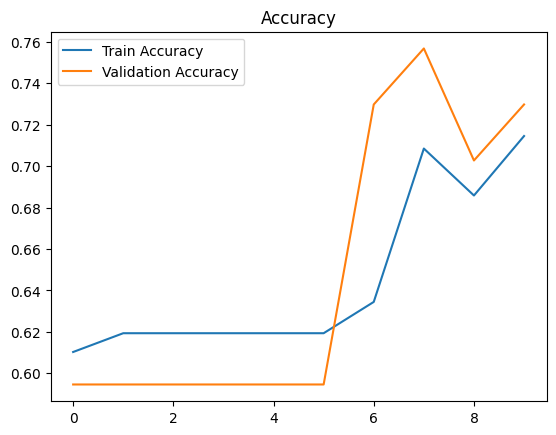

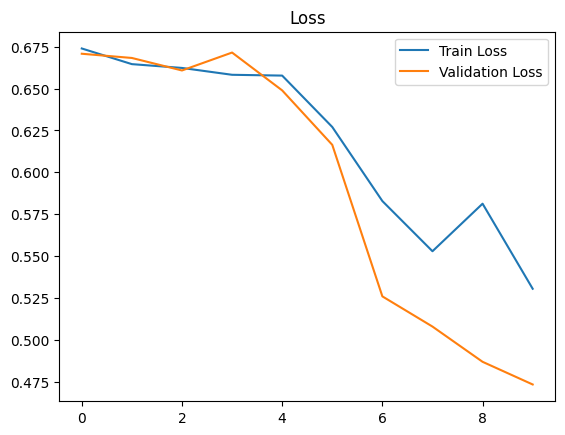

In [5]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


### **Summary of AlexNet Training and Results**
The AlexNet model was trained on the human detection dataset to classify images based on the presence of humans. Below is a summary of the training process and results:

1. **Dataset**:
   - Training set: **662 images**
   - Validation set: **74 images**
   - Test set: **185 images**

2. **Training Details**:
   - The model was trained for **10 epochs** using the `Adam` optimizer with a learning rate of `0.0001`.
   - Data augmentation techniques (e.g., rotation, zooming, horizontal flips) were applied to improve dataset diversity and model generalization.

3. **Results**:
   - **Final Training Accuracy**: ~71.45%
   - **Final Validation Accuracy**: ~72.97%
   - **Final Test Accuracy**: ~72.97%
   - The model achieved consistent performance between validation and test sets, indicating good generalization.

4. **Learning Trends**:
   - **Accuracy**:
     - Both training and validation accuracy improved steadily.
     - Validation accuracy peaked in the final epochs, surpassing training accuracy.
   - **Loss**:
     - Training and validation loss decreased steadily, confirming effective learning.


### Object Detection

In [8]:
import requests

# URL for the YOLOv5 ONNX model
url = "https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.onnx"

# Output file path
output_path = "yolov5s.onnx"

# Download the file
try:
    print(f"Downloading {url}...")
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Check if the request was successful

    # Save the file to the local directory
    with open(output_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)
    print(f"Model downloaded successfully and saved as {output_path}")
except Exception as e:
    print(f"Error downloading the model: {e}")


Model downloaded successfully and saved as yolov5s.onnx


In [1]:
import os
import cv2
import numpy as np

import cv2

try:
    net = cv2.dnn.readNet("yolov5s.onnx")
    print("ONNX model loaded successfully!")
except Exception as e:
    print("Error loading ONNX model:", e)


# Load YOLO weights and configuration
net = cv2.dnn.readNet("yolov5s.onnx")  # Make sure you have the yolov5s.onnx file

# Define class labels (COCO dataset)
classes = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat", "traffic light",
           "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow",
           "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee",
           "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
           "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple",
           "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa",
           "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote", "keyboard",
           "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors",
           "teddy bear", "hair drier", "toothbrush"]

# Define a function for object detection
def detect_objects(image_path):
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Preprocess the image for YOLO
    blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(640, 640), swapRB=True, crop=False)
    net.setInput(blob)

    # Forward pass through the network
    outputs = net.forward()

    # Extract boxes, confidences, and class IDs
    boxes, confidences, class_ids = [], [], []
    for detection in outputs[0]:
        confidence = detection[4]  # Confidence score is at index 4
        if confidence > 0.5:  # Confidence threshold
            # Scale bounding box coordinates to the original image dimensions
            x_center, y_center, w, h = detection[:4] * np.array([width, height, width, height])
            x_min = int(x_center - w / 2)
            y_min = int(y_center - h / 2)
            boxes.append([x_min, y_min, int(w), int(h)])
            confidences.append(float(confidence))
            class_ids.append(np.argmax(detection[5:]))

    # Apply non-maxima suppression
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

    # Draw the boxes and labels on the image
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, f"{label}: {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the image
    cv2.imshow("Object Detection", image)
    key = cv2.waitKey(3000)  # Close the window automatically after 3 seconds
    cv2.destroyAllWindows()



# Pick a sample image from the dataset
sample_image_path = os.path.join('human_detection_dataset', '1', os.listdir('human_detection_dataset/1')[0])

# Perform object detection on the sample image
detect_objects(sample_image_path)


ONNX model loaded successfully!


2024-11-16 20:36:21.433 Python[52475:3871228] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-16 20:36:21.433 Python[52475:3871228] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


### Pose Detection